In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from IPython.display import Image

np.set_printoptions(suppress=True, precision=3)

my_predictions = {}
r2_predictions = {}
mae_predictions = {}
my_pred = None
my_actual = None
my_name = None

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': actual})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(11, 8))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global my_predictions, colors, my_pred, my_actual, my_name
    
    my_name = name_
    my_pred = pred
    my_actual = actual

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['mse'], height=0.3)
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('MSE Error', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()
    
def r2_eval(name_, pred, actual):
    global r2_predictions, colors, my_pred, my_actual, my_name
    
    my_name = name_
    my_pred = pred
    my_actual = actual

    plot_predictions(name_, pred, actual)

    r2 = r2_score(pred, actual)
    r2_predictions[name_] = r2

    y_value = sorted(r2_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'r2'])
    print(df)
    min_ = df['r2'].min() - 10
    max_ = df['r2'].max() + 10
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['r2'], height=0.3)
    
    for i, v in enumerate(df['r2']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('r2 score', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()

def add_r2_model(name_, pred, actual):
    global r2_predictions, my_pred, my_actual, my_name
    my_name = name_
    my_pred = pred
    my_actual = actual
    
    r2 = r2_score(pred, actual)
    r2_predictions[name_] = r2
    
def r2_eval(name_, pred, actual):
    global mae_predictions, colors, my_pred, my_actual, my_name
    
    my_name = name_
    my_pred = pred
    my_actual = actual

    plot_predictions(name_, pred, actual)

    mae = mean_absolute_error(pred, actual)
    mae_predictions[name_] = mae

    y_value = sorted(mae_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mae'])
    print(df)
    min_ = df['mae'].min() - 10
    max_ = df['mae'].max() + 10
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['mae'], height=0.3)
    
    for i, v in enumerate(df['mae']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('mae score', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()

def add_mae_model(name_, pred, actual):
    global mae_predictions, my_pred, my_actual, my_name
    my_name = name_
    my_pred = pred
    my_actual = actual
    
    mae = mean_absolute_error(pred, actual)
    mae_predictions[name_] = mae

def add_model(name_, pred, actual):
    global my_predictions, my_pred, my_actual, my_name
    my_name = name_
    my_pred = pred
    my_actual = actual
    
    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

def plot_all():
    global my_predictions, my_pred, my_actual, my_name
    
    plot_predictions(my_name, my_pred, my_actual)
    
    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['mse'], height=0.3)
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('MSE Error', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()
    
def r2_plot_all():
    global r2_predictions, my_pred, my_actual, my_name
    
    plot_predictions(my_name, my_pred, my_actual)
    
    y_value = sorted(r2_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'r2'])
    print(df)
    min_ = df['r2'].min() - 10
    max_ = df['r2'].max() + 10
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['r2'], height=0.3)
    
    for i, v in enumerate(df['r2']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('r2 score', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()
    
def mae_plot_all():
    global mae_predictions, my_pred, my_actual, my_name
    
    plot_predictions(my_name, my_pred, my_actual)
    
    y_value = sorted(mae_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mae'])
    print(df)
    min_ = df['mae'].min() - 10
    max_ = df['mae'].max() + 10
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['mae'], height=0.3)
    
    for i, v in enumerate(df['mae']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('mae score', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()

### 계수 시각화 코드

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 방지

def plot_coef(columns, coef):
    # 데이터 프레임 만드는 코드
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)
    
    # 시각화 코드
    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

# 1. 데이터를 불러옴 

In [3]:
df = pd.read_csv("data/서울시 부동산 전월세가 정보_2022.csv", encoding='cp949')
df.head()

C:\Users\ice_9\AppData\Local\Temp\ipykernel_25144\1116531002.py:1: DtypeWarning: Columns (18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/서울시 부동산 전월세가 정보_2022.csv", encoding='cp949')


,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,층,...,보증금(만원),임대료(만원),건물명,건축년도,건물용도,계약기간,신규갱신여부,계약갱신권사용여부,종전 보증금,종전 임대료
0,2022,11350,노원구,10500,상계동,1.0,대지,1264.0,0.0,12.0,...,2676,2,은빛3단지,1998.0,아파트,NaN,NaN,NaN,NaN,NaN
1,2022,11170,용산구,10100,후암동,1.0,대지,406.0,73.0,2.0,...,19845,0,(406-73),2008.0,연립다세대,NaN,NaN,NaN,NaN,NaN
2,2022,11260,중랑구,10400,묵동,1.0,대지,169.0,12.0,12.0,...,3000,49,로프트원태릉입구역,2020.0,아파트,NaN,NaN,NaN,NaN,NaN
3,2022,11740,강동구,10500,길동,1.0,대지,407.0,3.0,4.0,...,18900,4,(407-3),2010.0,연립다세대,NaN,NaN,NaN,NaN,NaN
4,2022,11500,강서구,10900,방화동,1.0,대지,839.0,0.0,4.0,...,16000,20,방화그린,1993.0,아파트,NaN,NaN,NaN,NaN,NaN


In [4]:
df.head(2)

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,층,...,보증금(만원),임대료(만원),건물명,건축년도,건물용도,계약기간,신규갱신여부,계약갱신권사용여부,종전 보증금,종전 임대료
0,2022,11350,노원구,10500,상계동,1.0,대지,1264.0,0.0,12.0,...,2676,2,은빛3단지,1998.0,아파트,NaN,NaN,NaN,NaN,NaN
1,2022,11170,용산구,10100,후암동,1.0,대지,406.0,73.0,2.0,...,19845,0,(406-73),2008.0,연립다세대,NaN,NaN,NaN,NaN,NaN


In [5]:
# df['전월세 구분'].value_counts()    전월세 갯수확인

자치구 종류  
송파구     16437  관악구     14070  강남구     12654  마포구     10294  강서구     10220  동작구      9485  
강동구      9305  광진구      9212  서초구      8640  동대문구     7054  영등포구     6927  노원구      6779  
중랑구      6651  성북구      6537  은평구      6494  구로구      6404  성동구      5751  서대문구     5603  
양천구      5175  금천구      4244  용산구      4006  강북구      3780  도봉구      3434  종로구      2467  
중구       2440

In [6]:
df_sub = df.loc[df['전월세 구분']=='월세']         # 월세건
#songpa = df_sub.loc[df_sub['자치구명']=='송파구']  # 자치구 선택 ! 
songpa_gangsin = df_sub.loc[df_sub['신규갱신여부']=='갱신']  # 갱신 -> 종전 임대료 종전 보증금 있는 데이터만 사용
songpa_gangsin['층']=songpa_gangsin['층'].fillna(1) # 층이 없는 null 값 1로 채워줌

C:\Users\ice_9\AppData\Local\Temp\ipykernel_25144\2495252499.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songpa_gangsin['층']=songpa_gangsin['층'].fillna(1) # 층이 없는 null 값 1로 채워줌


널값 확인

In [7]:
songpa_gangsin.isnull().sum()

접수연도            0
자치구코드           0
자치구명            0
법정동코드           0
법정동명            0
지번구분         1809
지번구분명        1809
본번           1805
부번           1805
층               0
계약일             0
전월세 구분          0
임대면적(㎡)         0
보증금(만원)         0
임대료(만원)         0
건물명          1805
건축년도          104
건물용도            0
계약기간          759
신규갱신여부          0
계약갱신권사용여부    6945
종전 보증금          0
종전 임대료          4
dtype: int64

In [8]:
new = pd.read_csv("data/편의시설 변경 버전.csv")
new = new.drop("Unnamed: 0",1)
new.head(2)

C:\Users\ice_9\AppData\Local\Temp\ipykernel_25144\367607149.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  new = new.drop("Unnamed: 0",1)


,법정동명,지하철역,버스정류소,서점,골프연습장업,목욕장업,석유판매업,세탁업,영화상영관,제과점영업,...,의원,치안센터,경찰서,119안전센터,공원수,노래방수,당구장,음식점수,장보기시설,쇼핑시설
0,청운동,0,7,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,16,0.0,0.0
1,신교동,0,0,0,0,0,0,2,0,1,...,1,0,0,1,0,0,1,11,0.0,0.0


In [9]:
songpa_gangsin = pd.merge(songpa_gangsin,new,how='left',on='법정동명')

In [10]:
songpa_gangsin

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,층,...,의원,치안센터,경찰서,119안전센터,공원수,노래방수,당구장,음식점수,장보기시설,쇼핑시설
0,2022,11500,강서구,10500,마곡동,1.0,대지,776.0,4.0,11.0,...,141,0,0,1,1,20,10,1411,3.0,0.0
1,2022,11380,은평구,10600,대조동,1.0,대지,186.0,25.0,10.0,...,89,0,1,0,1,16,13,416,0.0,4.0
2,2022,11680,강남구,10100,역삼동,1.0,대지,755.0,4.0,11.0,...,513,1,1,1,11,65,47,3089,3.0,4.0
3,2022,11290,성북구,13300,정릉동,1.0,대지,239.0,0.0,15.0,...,38,3,2,0,3,19,22,522,2.0,0.0
4,2022,11380,은평구,11400,진관동,1.0,대지,73.0,0.0,10.0,...,53,2,1,1,9,3,3,311,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12578,2022,11710,송파구,10200,신천동,1.0,대지,17.0,0.0,4.0,...,91,0,2,0,5,2,1,420,3.0,3.0
12579,2022,11230,동대문구,10500,답십리동,1.0,대지,498.0,7.0,11.0,...,50,2,1,0,3,25,10,395,2.0,0.0
12580,2022,11680,강남구,10600,대치동,NaN,NaN,NaN,NaN,1.0,...,242,1,2,0,8,25,23,1376,0.0,6.0
12581,2022,11710,송파구,11200,오금동,1.0,대지,133.0,23.0,3.0,...,30,0,1,0,6,17,7,281,1.0,1.0


법정동은 일단 써보자
지번구분, 지번구분명, 본번, 부번, 건물명, 계약일(2022 데이터 사용하니까 일단 빼고 해봄), 전월세 구분, 계약기간, 신규갱신여부, 계약갱신권사용여부, 자치구코드, 자치구명<-본 데이터에서 할땐 넣는게 나을듯>, 법정동코드, 접수연도(일단 여기선빼고 하기)

In [11]:
songpa_train = songpa_gangsin.drop(['지번구분', '지번구분명', '본번', '부번', '건물명', '계약일', '전월세 구분', '계약기간', '신규갱신여부', '계약갱신권사용여부', '자치구코드','법정동코드', '접수연도'], axis=1)
#songpa_dum = pd.get_dummies(data = songpa_train, columns=['자치구명']) # 자치구 라벨인코딩

In [12]:
songpa_train

,자치구명,법정동명,층,임대면적(㎡),보증금(만원),임대료(만원),건축년도,건물용도,종전 보증금,종전 임대료,...,의원,치안센터,경찰서,119안전센터,공원수,노래방수,당구장,음식점수,장보기시설,쇼핑시설
0,강서구,마곡동,11.0,23.84,500,60,2015.0,오피스텔,500.0,57.0,...,141,0,0,1,1,20,10,1411,3.0,0.0
1,은평구,대조동,10.0,18.72,500,50,2013.0,오피스텔,500.0,50.0,...,89,0,1,0,1,16,13,416,0.0,4.0
2,강남구,역삼동,11.0,59.61,51000,102,2005.0,아파트,50000.0,70.0,...,513,1,1,1,11,65,47,3089,3.0,4.0
3,성북구,정릉동,15.0,59.88,15000,30,2005.0,아파트,10000.0,0.0,...,38,3,2,0,3,19,22,522,2.0,0.0
4,은평구,진관동,10.0,19.06,500,54,2017.0,오피스텔,500.0,54.0,...,53,2,1,1,9,3,3,311,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12578,송파구,신천동,4.0,84.90,60000,75,2008.0,아파트,60000.0,65.0,...,91,0,2,0,5,2,1,420,3.0,3.0
12579,동대문구,답십리동,11.0,19.53,500,60,2012.0,아파트,500.0,58.0,...,50,2,1,0,3,25,10,395,2.0,0.0
12580,강남구,대치동,1.0,60.00,20000,60,1997.0,단독다가구,20000.0,60.0,...,242,1,2,0,8,25,23,1376,0.0,6.0
12581,송파구,오금동,3.0,14.37,500,50,1990.0,연립다세대,500.0,50.0,...,30,0,1,0,6,17,7,281,1.0,1.0


In [13]:
#songpa_train = songpa_gangsin.drop(['지번구분', '지번구분명', '본번', '부번', '건물명', '계약일', '전월세 구분', '계약기간', '신규갱신여부', '계약갱신권사용여부', '자치구코드', '법정동코드', '접수연도'], axis=1)
#songpa_dum = pd.get_dummies(data = songpa_train, columns=['자치구명']) # 자치구 라벨인코딩
#songpa_dum = pd.get_dummies(data = songpa_train, columns=['법정동명']) # 법정동 라벨인코딩
songpa_dum = songpa_train.loc[songpa_train['건물용도']!='아파트'] # 아파트 제거 구별로 어떻게 할지 생각 해봐야할듯
songpa_dum = pd.get_dummies(data = songpa_dum, columns=['건물용도']) # 건물용도 라벨인코딩
songpa_dum =songpa_dum.dropna()      #  건축년도 null값 제거
songpa_dum = songpa_dum.loc[songpa_dum['종전 임대료']>0]  # 전세 할때는 이거 빼야됌
songpa_dum = songpa_dum.drop('법정동명',1)

C:\Users\ice_9\AppData\Local\Temp\ipykernel_25144\2556077690.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  songpa_dum = songpa_dum.drop('법정동명',1)


In [14]:
songpa_dum

,자치구명,층,임대면적(㎡),보증금(만원),임대료(만원),건축년도,종전 보증금,종전 임대료,지하철역,버스정류소,...,119안전센터,공원수,노래방수,당구장,음식점수,장보기시설,쇼핑시설,건물용도_단독다가구,건물용도_연립다세대,건물용도_오피스텔
0,강서구,11.0,23.84,500,60,2015.0,500.0,57.0,2,71,...,1,1,20,10,1411,3.0,0.0,0,0,1
1,은평구,10.0,18.72,500,50,2013.0,500.0,50.0,2,26,...,0,1,16,13,416,0.0,4.0,0,0,1
4,은평구,10.0,19.06,500,54,2017.0,500.0,54.0,1,61,...,1,9,3,3,311,0.0,1.0,0,0,1
13,마포구,7.0,23.09,1000,67,2014.0,1000.0,65.0,2,61,...,1,0,15,11,414,2.0,0.0,0,0,1
14,양천구,1.0,91.79,10000,59,1994.0,10000.0,55.0,2,88,...,2,0,62,27,1185,7.0,7.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12572,송파구,5.0,30.00,1000,82,2013.0,1000.0,78.0,1,48,...,0,11,34,12,1217,2.0,2.0,0,0,1
12576,동작구,4.0,32.70,2000,57,2002.0,6500.0,45.0,5,82,...,0,4,62,14,973,0.0,3.0,0,0,1
12580,강남구,1.0,60.00,20000,60,1997.0,20000.0,60.0,2,66,...,0,8,25,23,1376,0.0,6.0,1,0,0
12581,송파구,3.0,14.37,500,50,1990.0,500.0,50.0,2,32,...,0,6,17,7,281,1.0,1.0,0,1,0


In [15]:
#x_train, x_test, y_train, y_test = train_test_split(songpa_dum.drop('임대료(만원)', 1), songpa_dum['임대료(만원)'], random_state=0)
train = songpa_dum
test = songpa_dum[songpa_dum['자치구명'] == '송파구']

In [16]:
#songpa_dum = songpa_dum[songpa_dum['자치구명_송파구'] == 1]

In [17]:
songpa_dum

,자치구명,층,임대면적(㎡),보증금(만원),임대료(만원),건축년도,종전 보증금,종전 임대료,지하철역,버스정류소,...,119안전센터,공원수,노래방수,당구장,음식점수,장보기시설,쇼핑시설,건물용도_단독다가구,건물용도_연립다세대,건물용도_오피스텔
0,강서구,11.0,23.84,500,60,2015.0,500.0,57.0,2,71,...,1,1,20,10,1411,3.0,0.0,0,0,1
1,은평구,10.0,18.72,500,50,2013.0,500.0,50.0,2,26,...,0,1,16,13,416,0.0,4.0,0,0,1
4,은평구,10.0,19.06,500,54,2017.0,500.0,54.0,1,61,...,1,9,3,3,311,0.0,1.0,0,0,1
13,마포구,7.0,23.09,1000,67,2014.0,1000.0,65.0,2,61,...,1,0,15,11,414,2.0,0.0,0,0,1
14,양천구,1.0,91.79,10000,59,1994.0,10000.0,55.0,2,88,...,2,0,62,27,1185,7.0,7.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12572,송파구,5.0,30.00,1000,82,2013.0,1000.0,78.0,1,48,...,0,11,34,12,1217,2.0,2.0,0,0,1
12576,동작구,4.0,32.70,2000,57,2002.0,6500.0,45.0,5,82,...,0,4,62,14,973,0.0,3.0,0,0,1
12580,강남구,1.0,60.00,20000,60,1997.0,20000.0,60.0,2,66,...,0,8,25,23,1376,0.0,6.0,1,0,0
12581,송파구,3.0,14.37,500,50,1990.0,500.0,50.0,2,32,...,0,6,17,7,281,1.0,1.0,0,1,0


In [18]:
# df_sub['자치구명'].value_counts()
# songpa['신규갱신여부'].value_counts() 신규 갱신 갯수 알아보기용
# songpa_gangsin['부번'].unique() 부번의 종류

층이 없는 건물은 단독다가구 -> 층의 null 값을 1로 변경

In [19]:
# songpa_gangsin.loc[songpa_gangsin['층'].isnull(), '건물용도'].unique() 층이 없는 건물은 다 단독 다가구
# songpa_gangsin['계약갱신권사용여부'].unique()  계약 갱신권은 O 아니면 nan 뿐임

계약갱신권컬럼 사용할거면 사용 한거 1 안한거 0으로 주고 하면 될듯?

In [20]:
# songpa_gangsin['건물용도'].value_counts()  건물수 알아보기 아파트 794 연립다세대 791 오피스텔 300 단독다가구 155

건물명을 쓰지 않기 위해서 아파트를 뺀다..?

In [21]:
# len(songpa_gangsin.loc[songpa_gangsin['건물용도']=='아파트', '건물명'].value_counts())  아파트의 건물명120개더라
# len(songpa_gangsin['건물명'].value_counts())   송파구 전체 건물명은 764개더라 -> 컬럼으로 사용하기 부적절한듯
# len(songpa_gangsin['층'].value_counts())  층의 종류가 몇개 있는지

건축년도가 건물명을 대체해줄수 있지 않을까?

In [22]:
# songpa_gangsin['접수연도'].value_counts()   2022년
# songpa_gangsin.loc[songpa_gangsin['건물명'].isnull(), '건물용도'].unique()  단독 다가구는 건물명이 없다.
# len(songpa_gangsin['법정동명'].unique())
# songpa_dum['종전 임대료'].value_counts()  종전 임대료의 갯수 확인

## (월세)모델에 넣을 데이터 전처리!!

In [23]:
# songpa_dum.drop(['종전 보증금', '보증금(만원)'], axis=1, inplace=True)
# songpa_dum

In [24]:
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(songpa_dum.drop('임대료(만원)', 1), songpa_dum['임대료(만원)'], random_state=0)

In [25]:
x_train = train.drop(['임대료(만원)','자치구명'],1)
x_test = test.drop(['임대료(만원)','자치구명'],1)
y_train = train['임대료(만원)']
y_test = test['임대료(만원)']

C:\Users\ice_9\AppData\Local\Temp\ipykernel_25144\845394073.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train = train.drop(['임대료(만원)','자치구명'],1)
C:\Users\ice_9\AppData\Local\Temp\ipykernel_25144\845394073.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_test = test.drop(['임대료(만원)','자치구명'],1)


## 데이터 정렬 종전 임대료 가격순으로 오름차순 정렬 test 값들만 

In [26]:
# y_train.sort_values(ascending=True, inplace=True)
y_test = y_test.sort_values(ascending=True)
x_test = x_test.loc[y_test.index]
# x_train.loc[y_train.index]

### 1. LinearRegression 모델 성능 평가

data_adjust_LinearRegression mse :  20.211540752844254
우리가 임의로 정한 정확도 월세 오차 10이내 :  0.9512195121951219
data_adjust_r2_score :  0.971636772501254


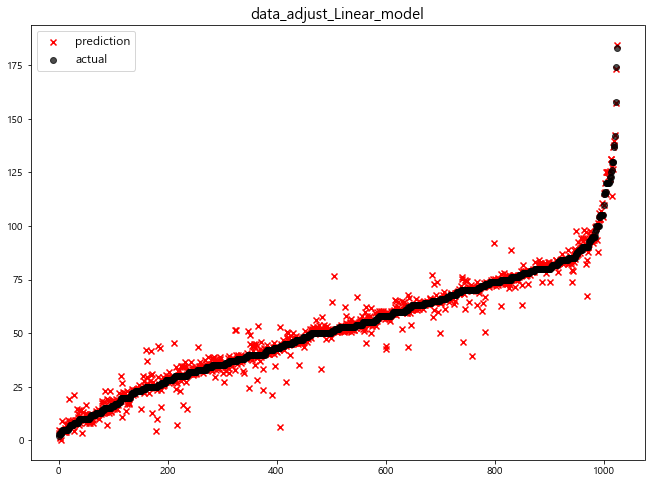

                      model        mse
0  data_adjust_Linear_model  20.211541


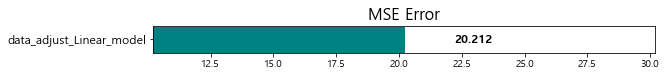

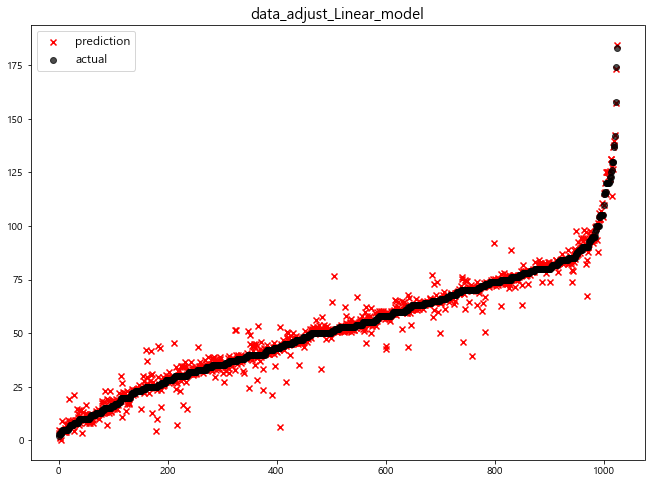

                      model        r2
0  data_adjust_Linear_model  0.972071


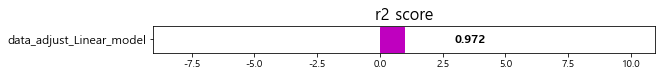

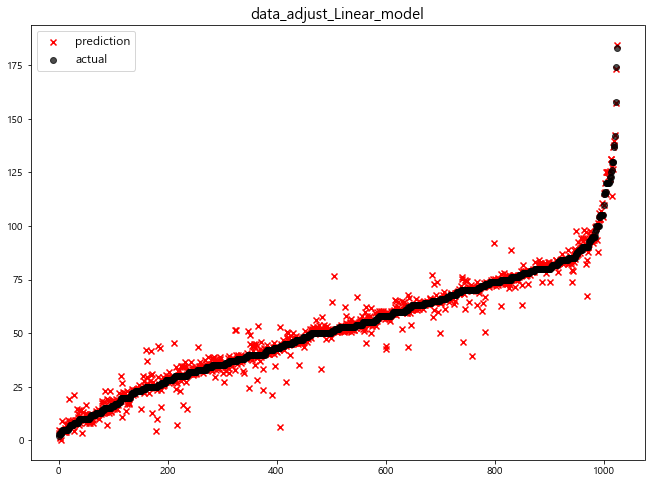

                      model       mae
0  data_adjust_Linear_model  2.491534


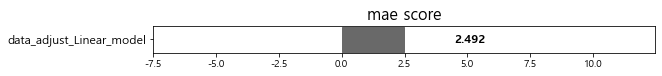

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression().fit(x_train, y_train)
pred = model.predict(x_test)
print('data_adjust_LinearRegression mse : ',mean_squared_error(y_test, pred))
print('우리가 임의로 정한 정확도 월세 오차 10이내 : ',(abs(y_test - pred)<10).mean())
print('data_adjust_r2_score : ', r2_score(y_test, pred))
add_model('data_adjust_Linear_model', pred, y_test)
plot_all()
add_r2_model('data_adjust_Linear_model', pred, y_test)
r2_plot_all()
add_mae_model('data_adjust_Linear_model', pred, y_test)
mae_plot_all()

In [28]:
# import matplotlib.pyplot as plt
# import numpy as np

In [29]:
# x = np.arange(503)
# plt.figure(figsize=(20, 20))
# plt.plot(x, pred, color='r', label='pred')   # 예측값
# plt.scatter(x, y_test, label='data')   # 실제값
# plt.legend(fontsize=18)
# plt.show()

### 2. DecisionTreeRegressor 모델 성능 평가

LinearRegression mse :  48.54702977941152
우리가 임의로 정한 tree 정확도 월세 오차 10이내 :  0.92
tree_r2_score :  0.9318730587212619


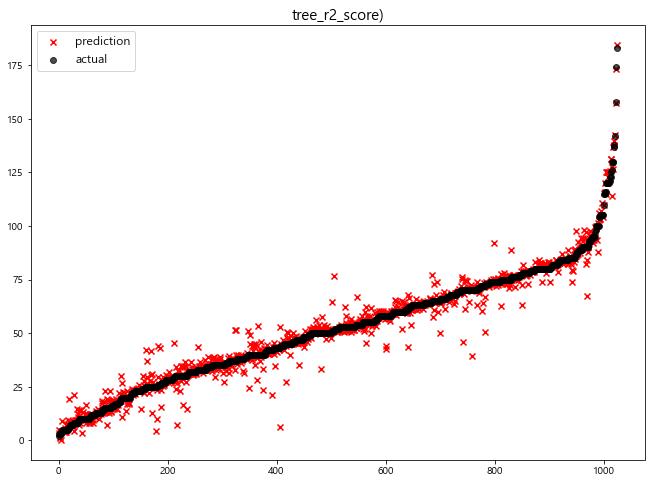

                      model        mse
0  data_adjust_Linear_model  20.211541
1                  tree_mse  20.211541


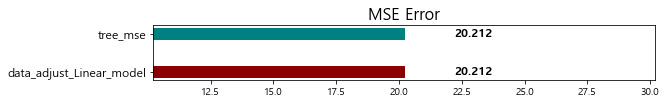

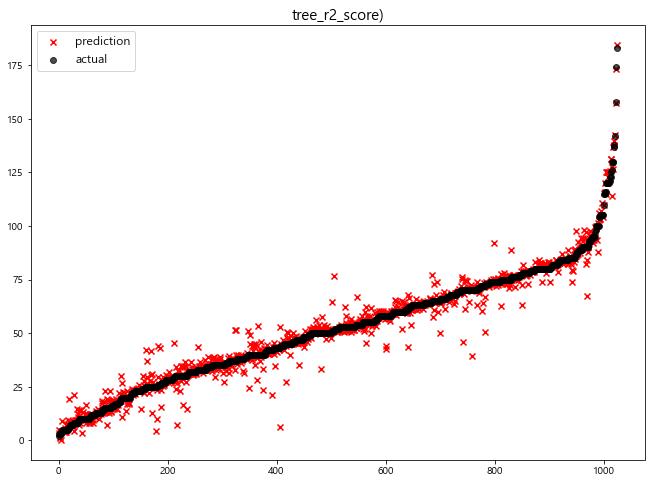

                      model        r2
0  data_adjust_Linear_model  0.972071
1            tree_r2_score)  0.972071


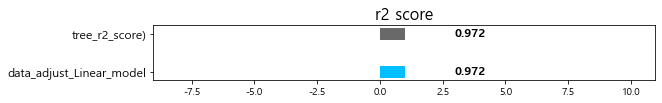

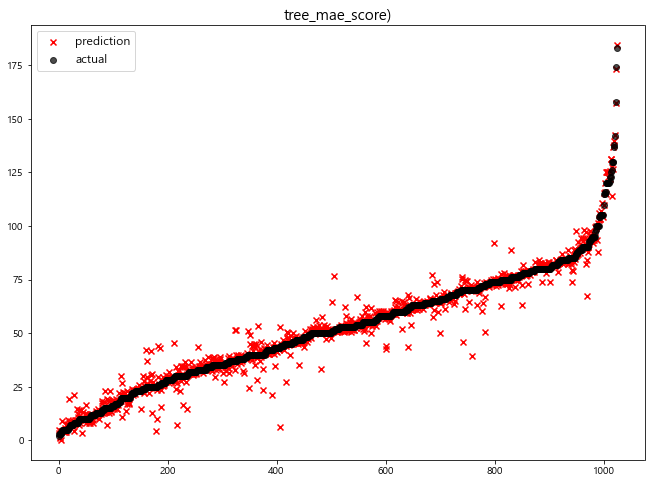

                      model       mae
0  data_adjust_Linear_model  2.491534
1           tree_mae_score)  2.491534


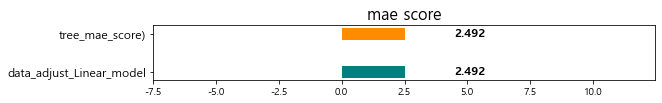

In [30]:
from sklearn.tree import DecisionTreeRegressor
treemodel = DecisionTreeRegressor(max_depth=5, random_state=0, min_samples_split=10).fit(x_train, y_train)
tree_pred = treemodel.predict(x_test)
print('LinearRegression mse : ',mean_squared_error(y_test, tree_pred))
print('우리가 임의로 정한 tree 정확도 월세 오차 10이내 : ',(abs(y_test - tree_pred)<10).mean())
print('tree_r2_score : ', r2_score(y_test, tree_pred))
add_model('tree_mse', pred, y_test)
add_r2_model('tree_r2_score)', pred, y_test)
plot_all()
r2_plot_all()
add_mae_model('tree_mae_score)', pred, y_test)
mae_plot_all()

### 샘플 데이터 하나씩 뽑아보면서 확인해보기

In [31]:
# sampledata_y=y_test.iloc[[10],]
# print('임의로 뽑은 정답 데이터', sampledata_y)
# sampledata_x=x_test.iloc[[10],]
# sampledata_x[['종전 임대료', '종전 보증금', '보증금(만원)']]
# print('모델의 예측 결과 : ', model.predict(sampledata_x))

### 3. 라소 모델 돌리면서 지표들 시각화하기!

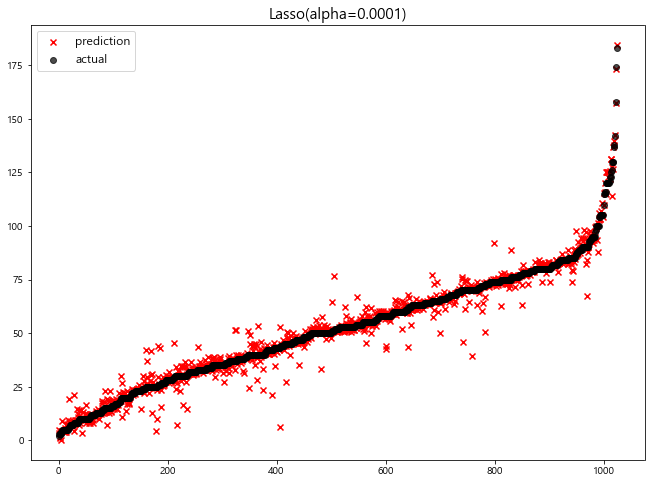

                      model        mse
0          Lasso(alpha=100)  23.360774
1           Lasso(alpha=10)  20.881254
2            Lasso(alpha=1)  20.536473
3          Lasso(alpha=0.1)  20.246443
4  data_adjust_Linear_model  20.211541
5                  tree_mse  20.211541
6       Lasso(alpha=0.0001)  20.211453
7        Lasso(alpha=0.001)  20.210674
8         Lasso(alpha=0.01)  20.204100


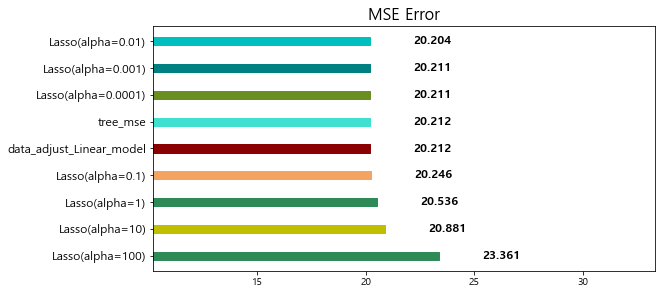

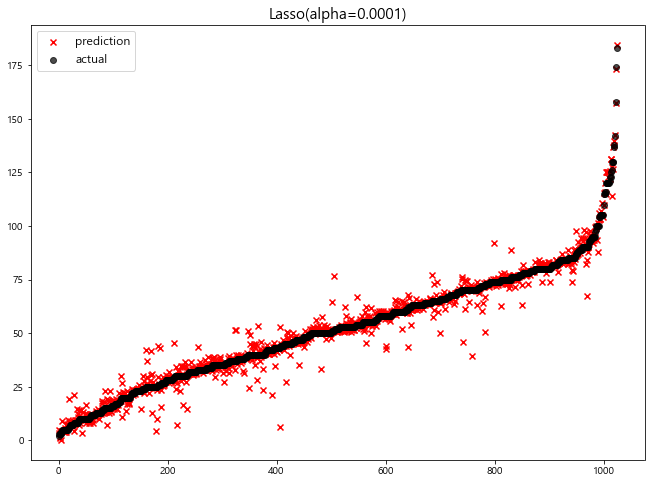

                      model        r2
0        Lasso(alpha=0.001)  0.972071
1       Lasso(alpha=0.0001)  0.972071
2  data_adjust_Linear_model  0.972071
3            tree_r2_score)  0.972071
4         Lasso(alpha=0.01)  0.972070
5          Lasso(alpha=0.1)  0.971947
6            Lasso(alpha=1)  0.971410
7           Lasso(alpha=10)  0.970665
8          Lasso(alpha=100)  0.961810


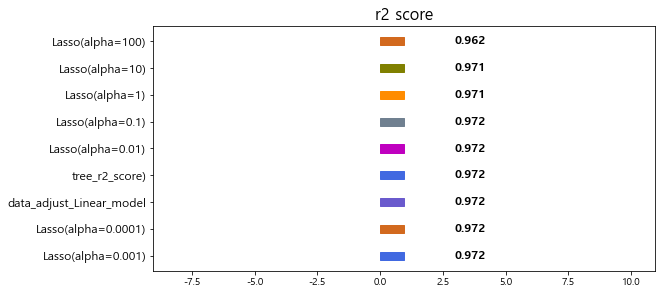

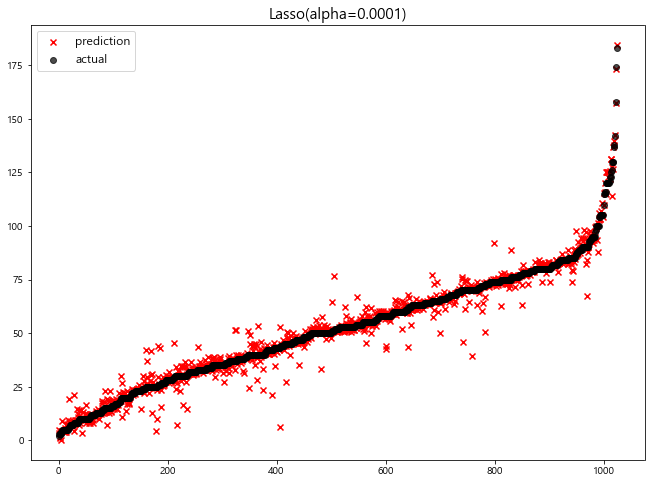

                      model       mae
0          Lasso(alpha=100)  3.060068
1            Lasso(alpha=1)  2.512171
2  data_adjust_Linear_model  2.491534
3           tree_mae_score)  2.491534
4       Lasso(alpha=0.0001)  2.491498
5        Lasso(alpha=0.001)  2.491175
6         Lasso(alpha=0.01)  2.488446
7          Lasso(alpha=0.1)  2.486401
8           Lasso(alpha=10)  2.457382


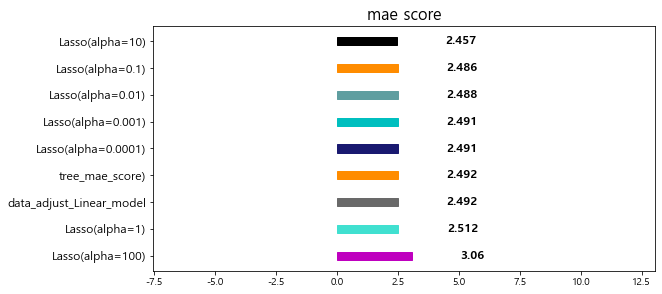

In [32]:
from sklearn.linear_model import Lasso
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train, y_train)
    pred = lasso.predict(x_test)
    add_model('Lasso(alpha={})'.format(alpha), pred, y_test)
    add_r2_model('Lasso(alpha={})'.format(alpha), pred, y_test)
    add_mae_model('Lasso(alpha={})'.format(alpha), pred, y_test)
plot_all()
r2_plot_all()
mae_plot_all()

### 4. Ridge 모델 확인 및 시각화

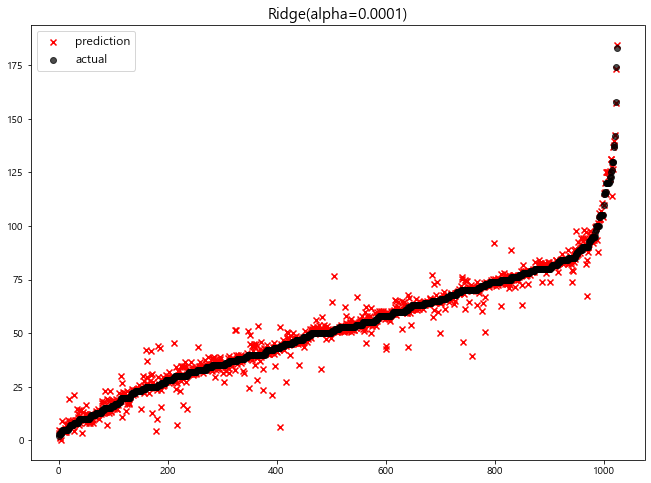

                       model        mse
0           Lasso(alpha=100)  23.360774
1            Lasso(alpha=10)  20.881254
2             Lasso(alpha=1)  20.536473
3           Lasso(alpha=0.1)  20.246443
4   data_adjust_Linear_model  20.211541
5                   tree_mse  20.211541
6        Ridge(alpha=0.0001)  20.211541
7         Ridge(alpha=0.001)  20.211541
8          Ridge(alpha=0.01)  20.211540
9           Ridge(alpha=0.1)  20.211532
10            Ridge(alpha=1)  20.211454
11       Lasso(alpha=0.0001)  20.211453
12           Ridge(alpha=10)  20.210697
13        Lasso(alpha=0.001)  20.210674
14          Ridge(alpha=100)  20.204904
15         Lasso(alpha=0.01)  20.204100


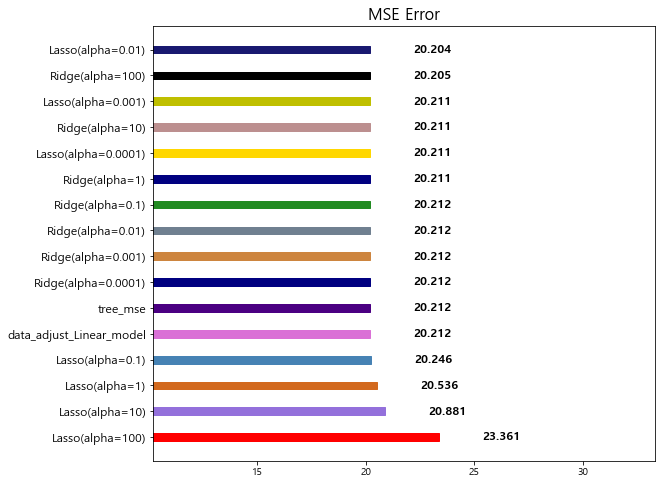

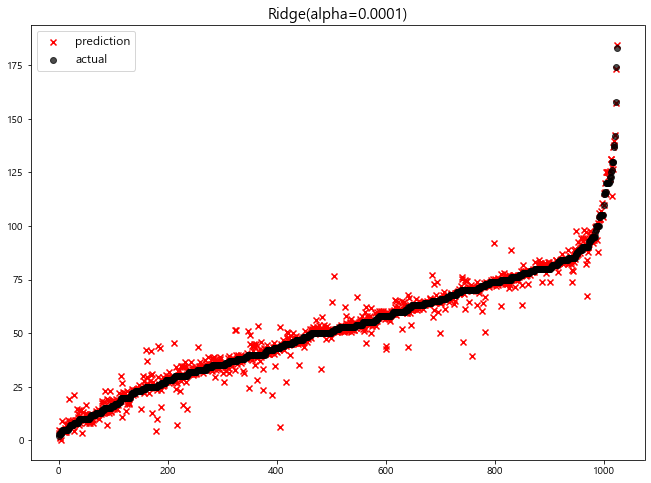

                       model        r2
0           Ridge(alpha=100)  0.972071
1            Ridge(alpha=10)  0.972071
2         Lasso(alpha=0.001)  0.972071
3             Ridge(alpha=1)  0.972071
4        Lasso(alpha=0.0001)  0.972071
5           Ridge(alpha=0.1)  0.972071
6          Ridge(alpha=0.01)  0.972071
7         Ridge(alpha=0.001)  0.972071
8        Ridge(alpha=0.0001)  0.972071
9   data_adjust_Linear_model  0.972071
10            tree_r2_score)  0.972071
11         Lasso(alpha=0.01)  0.972070
12          Lasso(alpha=0.1)  0.971947
13            Lasso(alpha=1)  0.971410
14           Lasso(alpha=10)  0.970665
15          Lasso(alpha=100)  0.961810


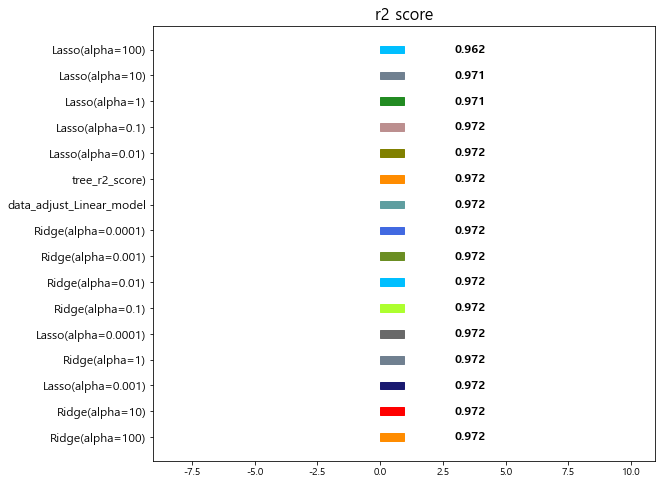

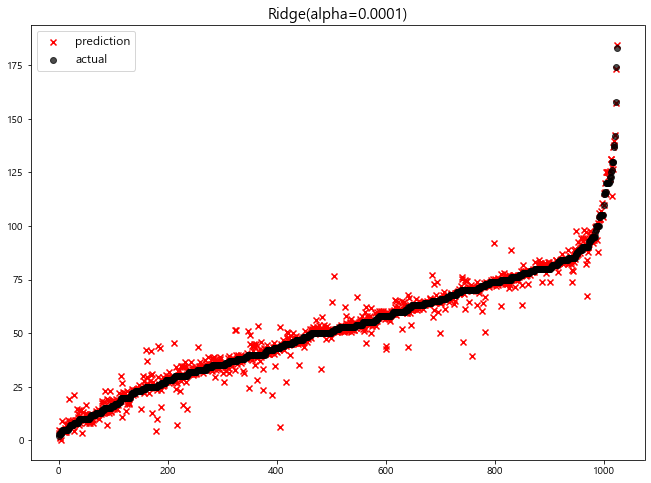

                       model       mae
0           Lasso(alpha=100)  3.060068
1             Lasso(alpha=1)  2.512171
2   data_adjust_Linear_model  2.491534
3            tree_mae_score)  2.491534
4        Ridge(alpha=0.0001)  2.491534
5         Ridge(alpha=0.001)  2.491534
6          Ridge(alpha=0.01)  2.491533
7           Ridge(alpha=0.1)  2.491531
8             Ridge(alpha=1)  2.491511
9        Lasso(alpha=0.0001)  2.491498
10           Ridge(alpha=10)  2.491308
11        Lasso(alpha=0.001)  2.491175
12          Ridge(alpha=100)  2.489668
13         Lasso(alpha=0.01)  2.488446
14          Lasso(alpha=0.1)  2.486401
15           Lasso(alpha=10)  2.457382


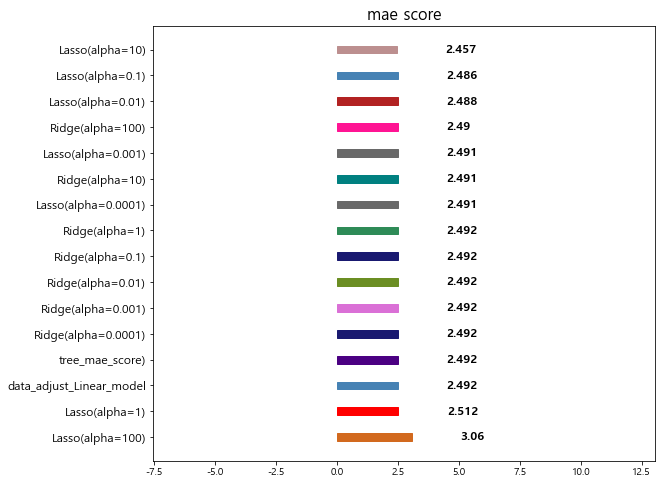

In [33]:
from sklearn.linear_model import Ridge
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_train, y_train)
    pred = ridge.predict(x_test)
    add_model('Ridge(alpha={})'.format(alpha), pred, y_test)
    add_r2_model('Ridge(alpha={})'.format(alpha), pred, y_test)
    add_mae_model('Ridge(alpha={})'.format(alpha), pred, y_test)
plot_all()
r2_plot_all()
mae_plot_all()

### model의 계수 확인

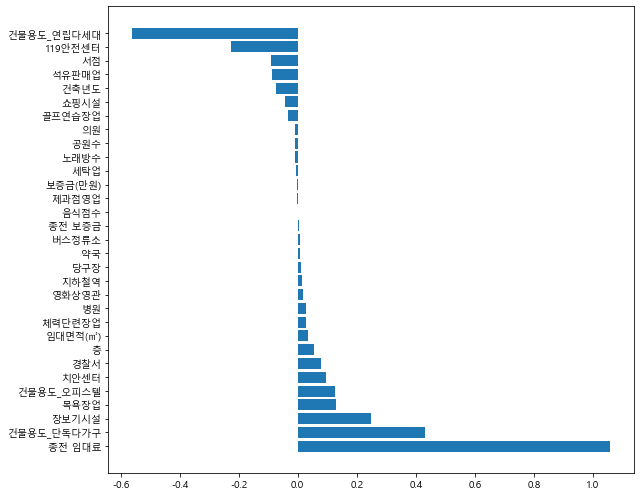

In [34]:
plot_coef(x_train.columns, model.coef_)

### 5. ElasticNet 모델 사용

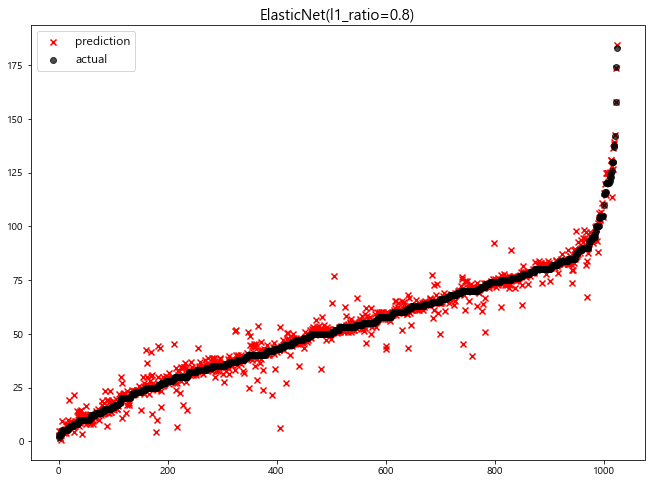

                       model        mse
0           Lasso(alpha=100)  23.360774
1            Lasso(alpha=10)  20.881254
2             Lasso(alpha=1)  20.536473
3           Lasso(alpha=0.1)  20.246443
4   ElasticNet(l1_ratio=0.8)  20.228354
5   ElasticNet(l1_ratio=0.2)  20.213516
6   data_adjust_Linear_model  20.211541
7                   tree_mse  20.211541
8        Ridge(alpha=0.0001)  20.211541
9         Ridge(alpha=0.001)  20.211541
10         Ridge(alpha=0.01)  20.211540
11          Ridge(alpha=0.1)  20.211532
12            Ridge(alpha=1)  20.211454
13       Lasso(alpha=0.0001)  20.211453
14  ElasticNet(l1_ratio=0.5)  20.211328
15           Ridge(alpha=10)  20.210697
16        Lasso(alpha=0.001)  20.210674
17          Ridge(alpha=100)  20.204904
18         Lasso(alpha=0.01)  20.204100


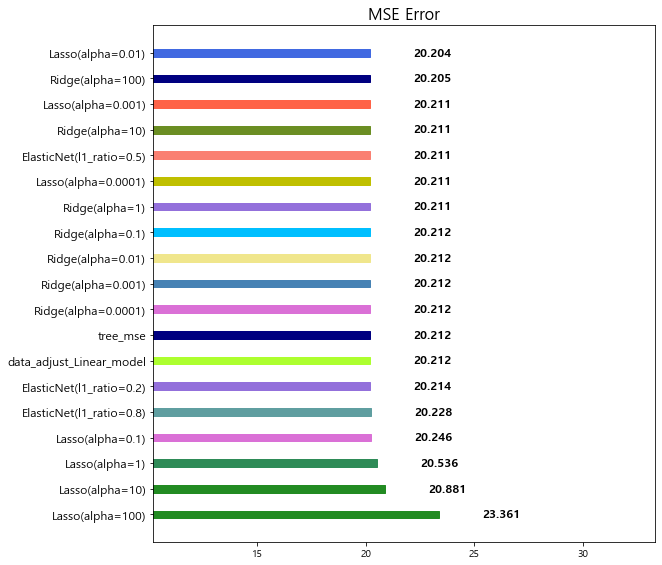

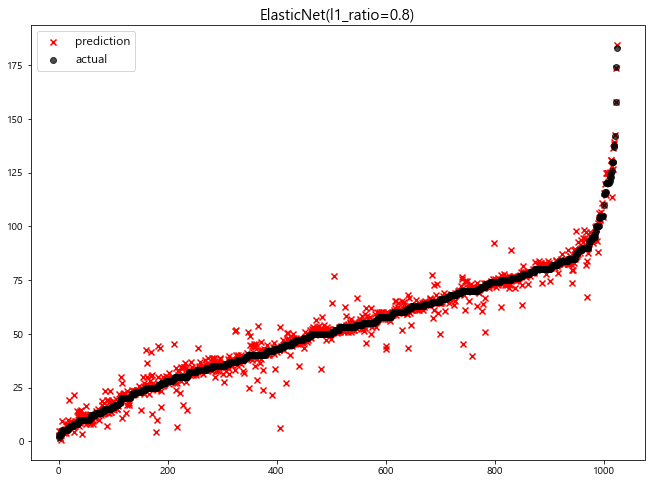

                       model        r2
0           Ridge(alpha=100)  0.972071
1            Ridge(alpha=10)  0.972071
2         Lasso(alpha=0.001)  0.972071
3             Ridge(alpha=1)  0.972071
4        Lasso(alpha=0.0001)  0.972071
5           Ridge(alpha=0.1)  0.972071
6          Ridge(alpha=0.01)  0.972071
7         Ridge(alpha=0.001)  0.972071
8        Ridge(alpha=0.0001)  0.972071
9   data_adjust_Linear_model  0.972071
10            tree_r2_score)  0.972071
11         Lasso(alpha=0.01)  0.972070
12  ElasticNet(l1_ratio=0.2)  0.972017
13  ElasticNet(l1_ratio=0.5)  0.972012
14  ElasticNet(l1_ratio=0.8)  0.971981
15          Lasso(alpha=0.1)  0.971947
16            Lasso(alpha=1)  0.971410
17           Lasso(alpha=10)  0.970665
18          Lasso(alpha=100)  0.961810


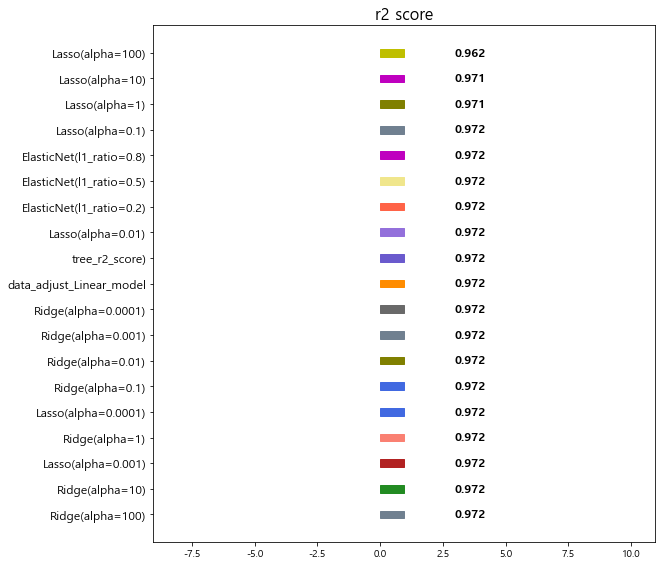

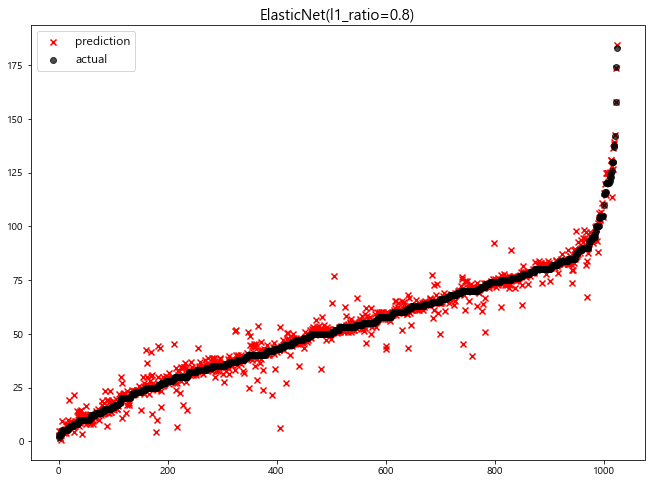

                       model       mae
0           Lasso(alpha=100)  3.060068
1             Lasso(alpha=1)  2.512171
2   data_adjust_Linear_model  2.491534
3            tree_mae_score)  2.491534
4        Ridge(alpha=0.0001)  2.491534
5         Ridge(alpha=0.001)  2.491534
6          Ridge(alpha=0.01)  2.491533
7           Ridge(alpha=0.1)  2.491531
8             Ridge(alpha=1)  2.491511
9        Lasso(alpha=0.0001)  2.491498
10           Ridge(alpha=10)  2.491308
11        Lasso(alpha=0.001)  2.491175
12          Ridge(alpha=100)  2.489668
13         Lasso(alpha=0.01)  2.488446
14          Lasso(alpha=0.1)  2.486401
15  ElasticNet(l1_ratio=0.2)  2.486395
16  ElasticNet(l1_ratio=0.5)  2.485365
17  ElasticNet(l1_ratio=0.8)  2.485347
18           Lasso(alpha=10)  2.457382


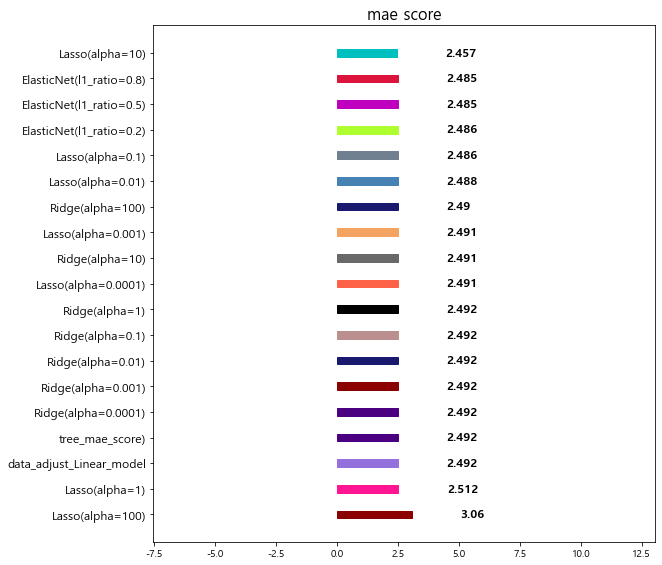

In [35]:
from sklearn.linear_model import ElasticNet

# 이번에는 alpha값을 고정시키겠다.
alpha = 0.1

#l1_ratio값을 다르게 하면서 모델의 하이브리드 성능을 예측, 관찰
ratios = [0.2, 0.5, 0.8]

for ratio in ratios:   
    elasticnet = ElasticNet(alpha=alpha, l1_ratio=ratio)
    elasticnet.fit(x_train, y_train)
    pred = elasticnet.predict(x_test)
    add_model('ElasticNet(l1_ratio={})'.format(ratio), pred, y_test)
    add_r2_model('ElasticNet(l1_ratio={})'.format(ratio), pred, y_test)
    add_mae_model('ElasticNet(l1_ratio={})'.format(ratio), pred, y_test)
plot_all()
r2_plot_all()
mae_plot_all()

## 파이프라인 (pipeline)
- Scaler 적용

In [36]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import make_pipeline

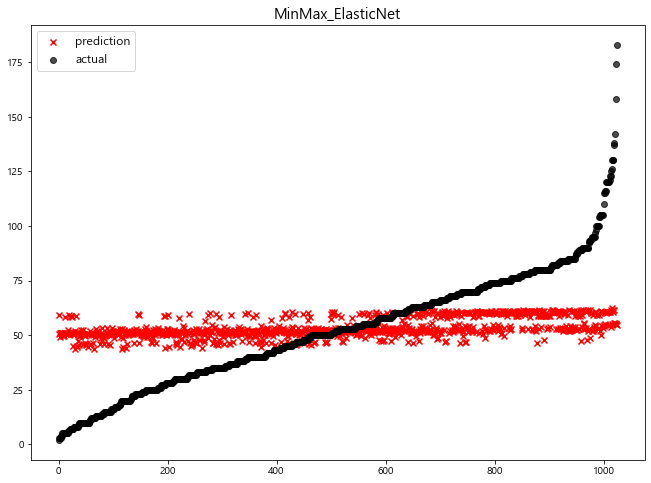

                       model         mse
0          MinMax_ElasticNet  604.339072
1           Lasso(alpha=100)   23.360774
2            Lasso(alpha=10)   20.881254
3             Lasso(alpha=1)   20.536473
4           Lasso(alpha=0.1)   20.246443
5   ElasticNet(l1_ratio=0.8)   20.228354
6   ElasticNet(l1_ratio=0.2)   20.213516
7   data_adjust_Linear_model   20.211541
8                   tree_mse   20.211541
9        Ridge(alpha=0.0001)   20.211541
10        Ridge(alpha=0.001)   20.211541
11         Ridge(alpha=0.01)   20.211540
12          Ridge(alpha=0.1)   20.211532
13            Ridge(alpha=1)   20.211454
14       Lasso(alpha=0.0001)   20.211453
15  ElasticNet(l1_ratio=0.5)   20.211328
16           Ridge(alpha=10)   20.210697
17        Lasso(alpha=0.001)   20.210674
18          Ridge(alpha=100)   20.204904
19         Lasso(alpha=0.01)   20.204100


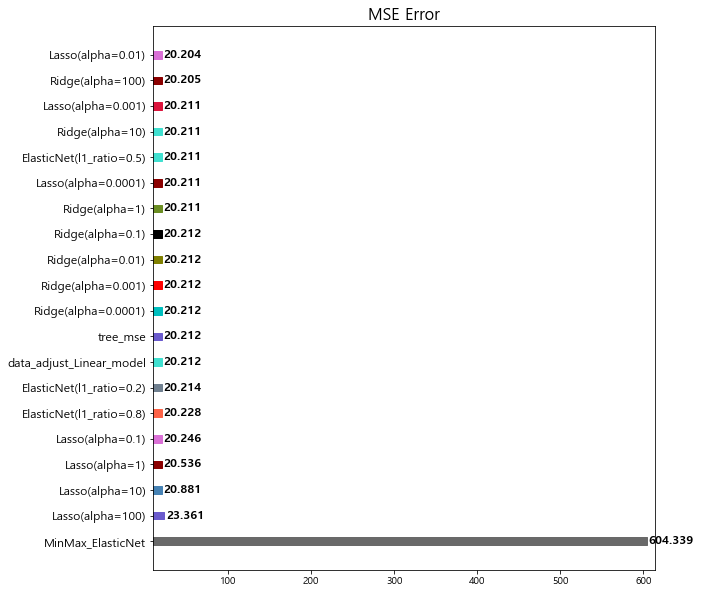

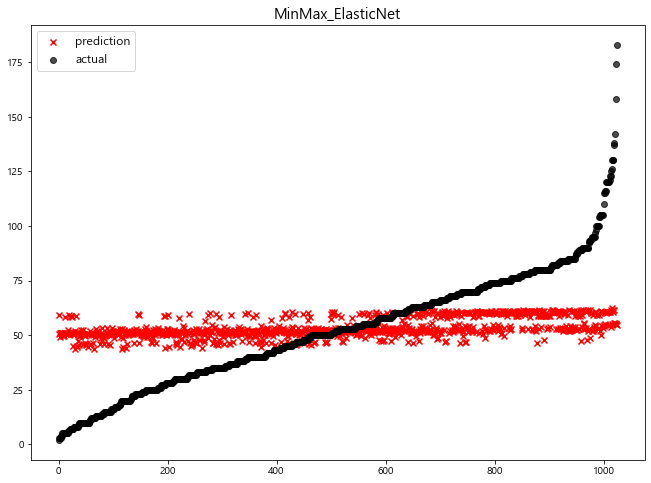

                       model         r2
0           Ridge(alpha=100)   0.972071
1            Ridge(alpha=10)   0.972071
2         Lasso(alpha=0.001)   0.972071
3             Ridge(alpha=1)   0.972071
4        Lasso(alpha=0.0001)   0.972071
5           Ridge(alpha=0.1)   0.972071
6          Ridge(alpha=0.01)   0.972071
7         Ridge(alpha=0.001)   0.972071
8        Ridge(alpha=0.0001)   0.972071
9   data_adjust_Linear_model   0.972071
10            tree_r2_score)   0.972071
11         Lasso(alpha=0.01)   0.972070
12  ElasticNet(l1_ratio=0.2)   0.972017
13  ElasticNet(l1_ratio=0.5)   0.972012
14  ElasticNet(l1_ratio=0.8)   0.971981
15          Lasso(alpha=0.1)   0.971947
16            Lasso(alpha=1)   0.971410
17           Lasso(alpha=10)   0.970665
18          Lasso(alpha=100)   0.961810
19         MinMax_ElasticNet -29.280723


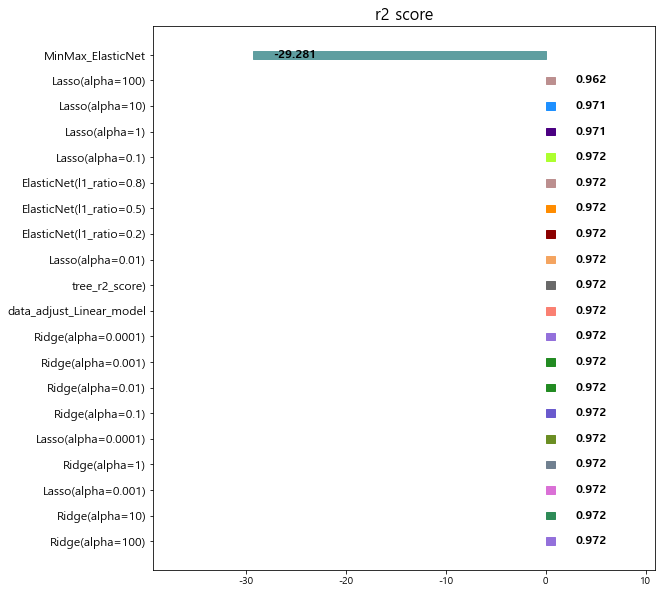

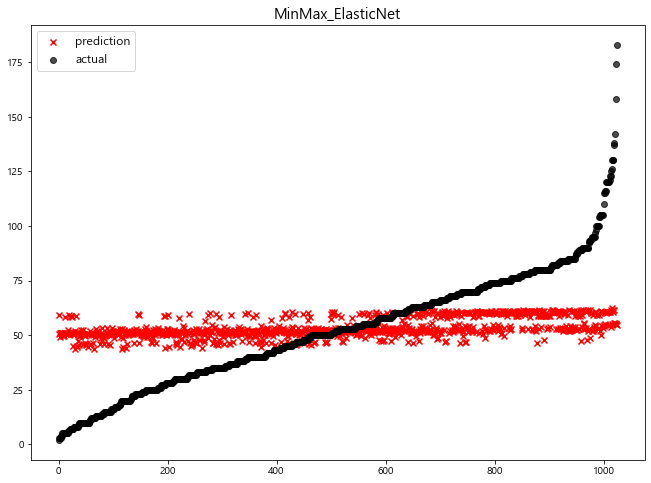

                       model        mae
0          MinMax_ElasticNet  19.361428
1           Lasso(alpha=100)   3.060068
2             Lasso(alpha=1)   2.512171
3   data_adjust_Linear_model   2.491534
4            tree_mae_score)   2.491534
5        Ridge(alpha=0.0001)   2.491534
6         Ridge(alpha=0.001)   2.491534
7          Ridge(alpha=0.01)   2.491533
8           Ridge(alpha=0.1)   2.491531
9             Ridge(alpha=1)   2.491511
10       Lasso(alpha=0.0001)   2.491498
11           Ridge(alpha=10)   2.491308
12        Lasso(alpha=0.001)   2.491175
13          Ridge(alpha=100)   2.489668
14         Lasso(alpha=0.01)   2.488446
15          Lasso(alpha=0.1)   2.486401
16  ElasticNet(l1_ratio=0.2)   2.486395
17  ElasticNet(l1_ratio=0.5)   2.485365
18  ElasticNet(l1_ratio=0.8)   2.485347
19           Lasso(alpha=10)   2.457382


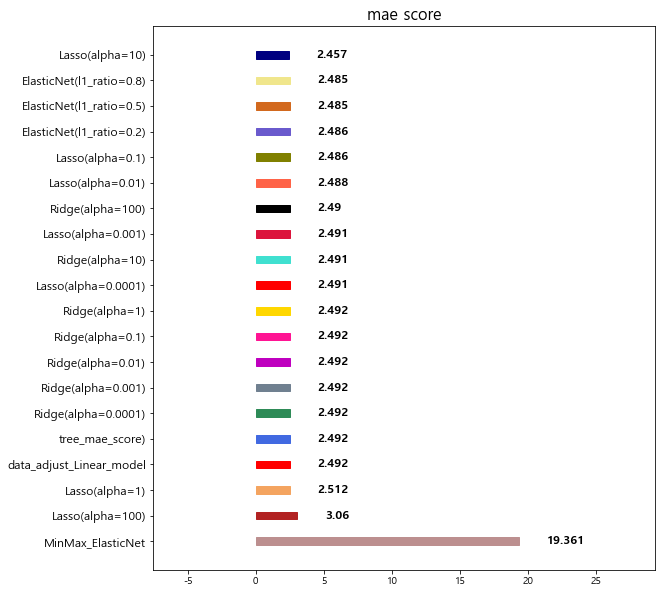

In [37]:
elastic_pipeline = make_pipeline(
   MinMaxScaler(),
   ElasticNet(alpha=0.1, l1_ratio=0.2),
)
elastic_pipeline.fit(x_train, y_train)
elastic_pipeline_pred = elastic_pipeline.predict(x_test)
add_model('MinMax_ElasticNet', elastic_pipeline_pred, y_test)
add_r2_model('MinMax_ElasticNet', elastic_pipeline_pred, y_test)
add_mae_model('MinMax_ElasticNet', elastic_pipeline_pred, y_test)
plot_all()
r2_plot_all()
mae_plot_all()

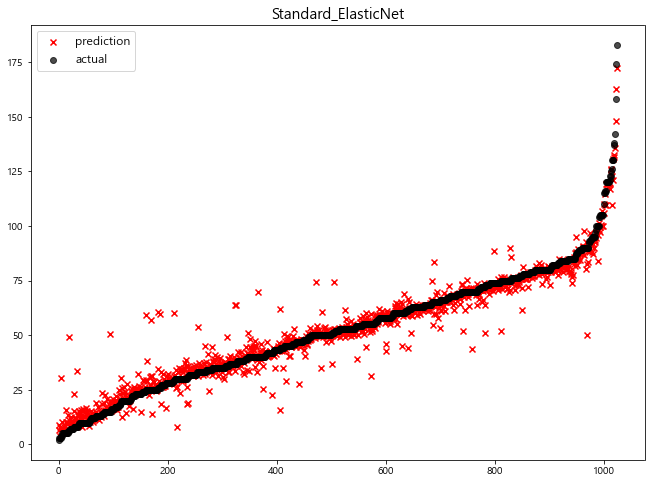

                       model         mse
0          MinMax_ElasticNet  604.339072
1        Standard_ElasticNet   35.396775
2           Lasso(alpha=100)   23.360774
3            Lasso(alpha=10)   20.881254
4             Lasso(alpha=1)   20.536473
5           Lasso(alpha=0.1)   20.246443
6   ElasticNet(l1_ratio=0.8)   20.228354
7   ElasticNet(l1_ratio=0.2)   20.213516
8   data_adjust_Linear_model   20.211541
9                   tree_mse   20.211541
10       Ridge(alpha=0.0001)   20.211541
11        Ridge(alpha=0.001)   20.211541
12         Ridge(alpha=0.01)   20.211540
13          Ridge(alpha=0.1)   20.211532
14            Ridge(alpha=1)   20.211454
15       Lasso(alpha=0.0001)   20.211453
16  ElasticNet(l1_ratio=0.5)   20.211328
17           Ridge(alpha=10)   20.210697
18        Lasso(alpha=0.001)   20.210674
19          Ridge(alpha=100)   20.204904
20         Lasso(alpha=0.01)   20.204100


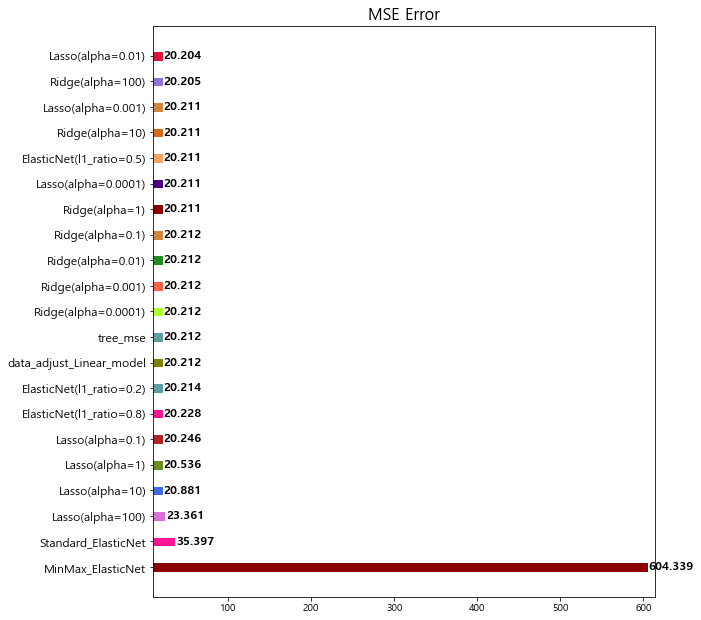

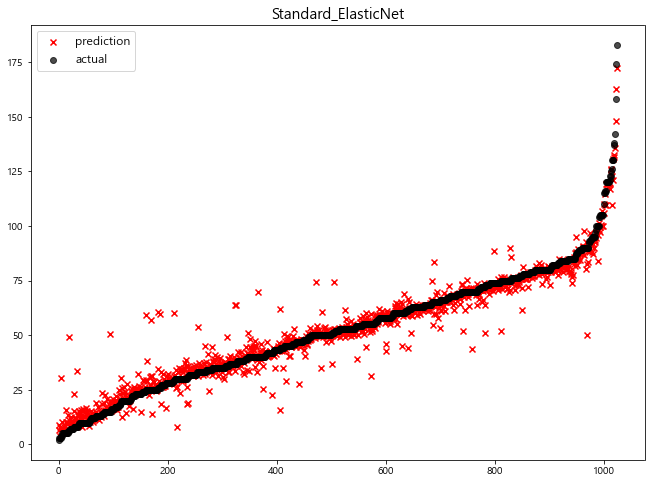

                       model         r2
0           Ridge(alpha=100)   0.972071
1            Ridge(alpha=10)   0.972071
2         Lasso(alpha=0.001)   0.972071
3             Ridge(alpha=1)   0.972071
4        Lasso(alpha=0.0001)   0.972071
5           Ridge(alpha=0.1)   0.972071
6          Ridge(alpha=0.01)   0.972071
7         Ridge(alpha=0.001)   0.972071
8        Ridge(alpha=0.0001)   0.972071
9   data_adjust_Linear_model   0.972071
10            tree_r2_score)   0.972071
11         Lasso(alpha=0.01)   0.972070
12  ElasticNet(l1_ratio=0.2)   0.972017
13  ElasticNet(l1_ratio=0.5)   0.972012
14  ElasticNet(l1_ratio=0.8)   0.971981
15          Lasso(alpha=0.1)   0.971947
16            Lasso(alpha=1)   0.971410
17           Lasso(alpha=10)   0.970665
18          Lasso(alpha=100)   0.961810
19       Standard_ElasticNet   0.943752
20         MinMax_ElasticNet -29.280723


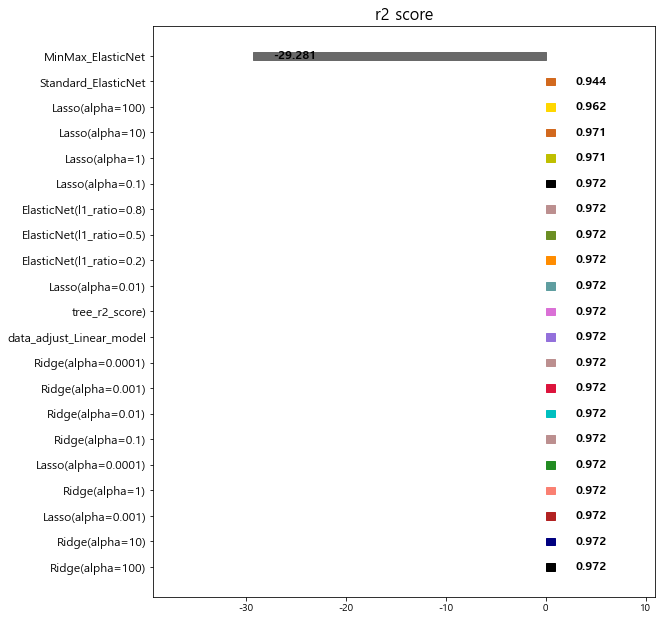

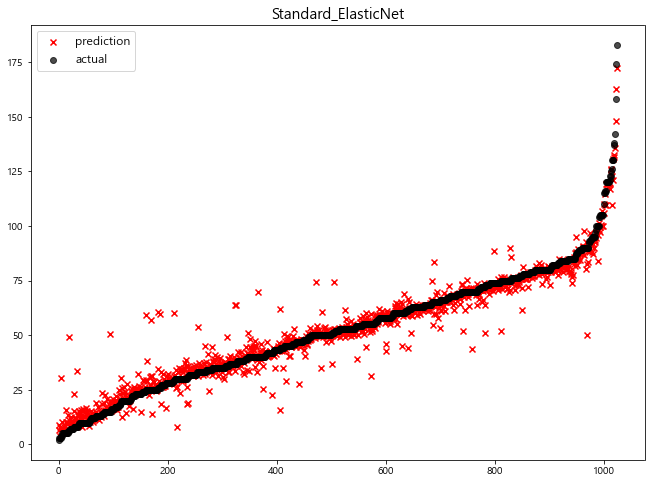

                       model        mae
0          MinMax_ElasticNet  19.361428
1        Standard_ElasticNet   3.385518
2           Lasso(alpha=100)   3.060068
3             Lasso(alpha=1)   2.512171
4   data_adjust_Linear_model   2.491534
5            tree_mae_score)   2.491534
6        Ridge(alpha=0.0001)   2.491534
7         Ridge(alpha=0.001)   2.491534
8          Ridge(alpha=0.01)   2.491533
9           Ridge(alpha=0.1)   2.491531
10            Ridge(alpha=1)   2.491511
11       Lasso(alpha=0.0001)   2.491498
12           Ridge(alpha=10)   2.491308
13        Lasso(alpha=0.001)   2.491175
14          Ridge(alpha=100)   2.489668
15         Lasso(alpha=0.01)   2.488446
16          Lasso(alpha=0.1)   2.486401
17  ElasticNet(l1_ratio=0.2)   2.486395
18  ElasticNet(l1_ratio=0.5)   2.485365
19  ElasticNet(l1_ratio=0.8)   2.485347
20           Lasso(alpha=10)   2.457382


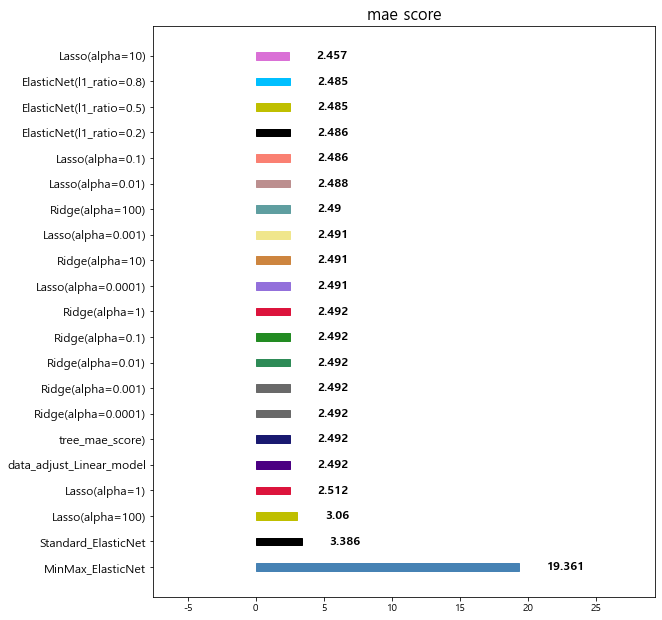

In [38]:
pipeline = make_pipeline(
   StandardScaler(),
   ElasticNet(alpha=0.1, l1_ratio=0.2)
)
pipeline.fit(x_train, y_train)
pipeline_pred = pipeline.predict(x_test)
add_model('Standard_ElasticNet', pipeline_pred, y_test)
add_r2_model('Standard_ElasticNet', pipeline_pred, y_test)
add_mae_model('Standard_ElasticNet', pipeline_pred, y_test)
plot_all()
r2_plot_all()
mae_plot_all()

### 6. PolynomialFeature 추가 모델

In [39]:
from sklearn.preprocessing import PolynomialFeatures

c:\Users\ice_9\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.489e+04, tolerance: 5.793e+02
  model = cd_fast.enet_coordinate_descent(


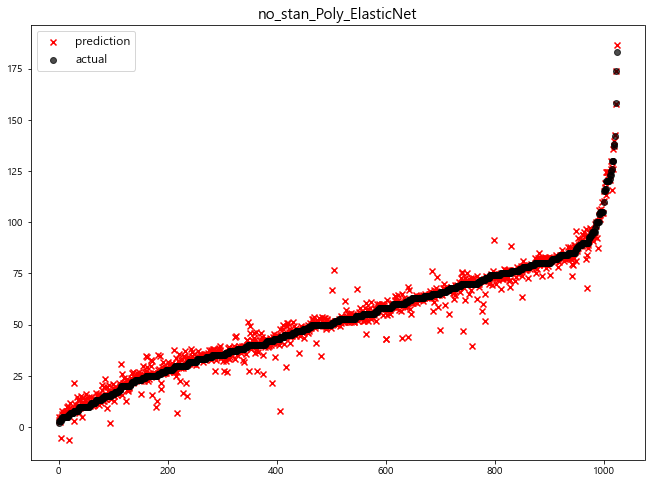

                       model         mse
0          MinMax_ElasticNet  604.339072
1        Standard_ElasticNet   35.396775
2           Lasso(alpha=100)   23.360774
3            Lasso(alpha=10)   20.881254
4             Lasso(alpha=1)   20.536473
5           Lasso(alpha=0.1)   20.246443
6   ElasticNet(l1_ratio=0.8)   20.228354
7   ElasticNet(l1_ratio=0.2)   20.213516
8   data_adjust_Linear_model   20.211541
9                   tree_mse   20.211541
10       Ridge(alpha=0.0001)   20.211541
11        Ridge(alpha=0.001)   20.211541
12         Ridge(alpha=0.01)   20.211540
13          Ridge(alpha=0.1)   20.211532
14            Ridge(alpha=1)   20.211454
15       Lasso(alpha=0.0001)   20.211453
16  ElasticNet(l1_ratio=0.5)   20.211328
17           Ridge(alpha=10)   20.210697
18        Lasso(alpha=0.001)   20.210674
19          Ridge(alpha=100)   20.204904
20         Lasso(alpha=0.01)   20.204100
21   no_stan_Poly_ElasticNet   18.656522


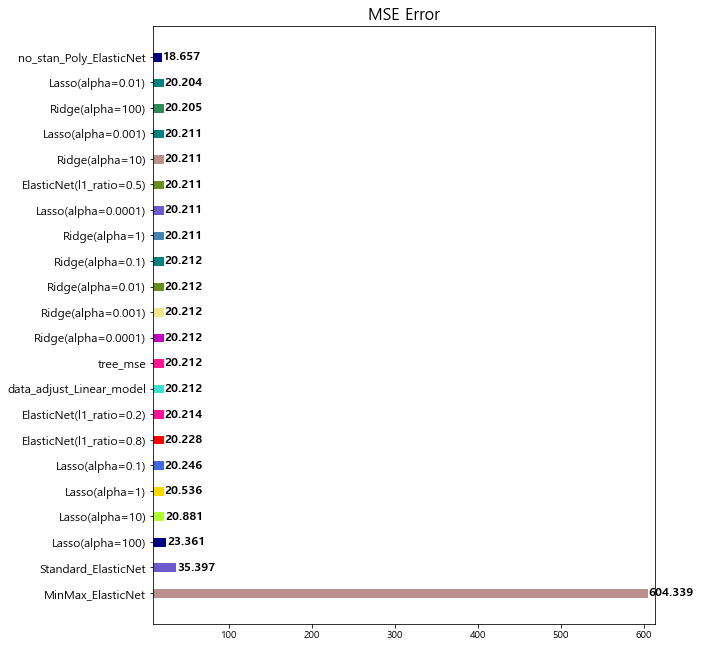

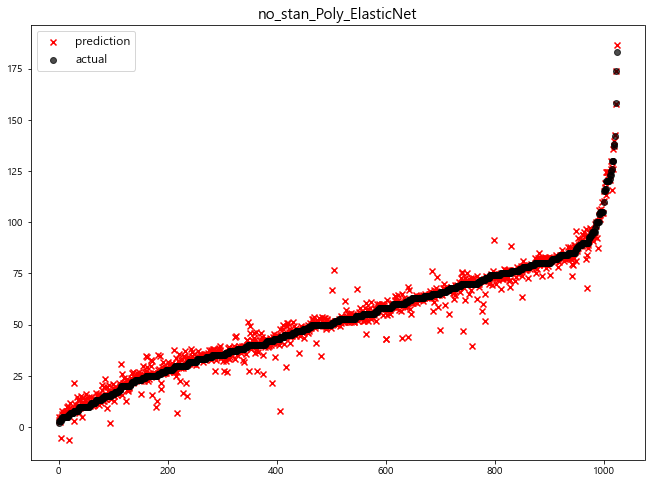

                       model         r2
0    no_stan_Poly_ElasticNet   0.973678
1           Ridge(alpha=100)   0.972071
2            Ridge(alpha=10)   0.972071
3         Lasso(alpha=0.001)   0.972071
4             Ridge(alpha=1)   0.972071
5        Lasso(alpha=0.0001)   0.972071
6           Ridge(alpha=0.1)   0.972071
7          Ridge(alpha=0.01)   0.972071
8         Ridge(alpha=0.001)   0.972071
9        Ridge(alpha=0.0001)   0.972071
10  data_adjust_Linear_model   0.972071
11            tree_r2_score)   0.972071
12         Lasso(alpha=0.01)   0.972070
13  ElasticNet(l1_ratio=0.2)   0.972017
14  ElasticNet(l1_ratio=0.5)   0.972012
15  ElasticNet(l1_ratio=0.8)   0.971981
16          Lasso(alpha=0.1)   0.971947
17            Lasso(alpha=1)   0.971410
18           Lasso(alpha=10)   0.970665
19          Lasso(alpha=100)   0.961810
20       Standard_ElasticNet   0.943752
21         MinMax_ElasticNet -29.280723


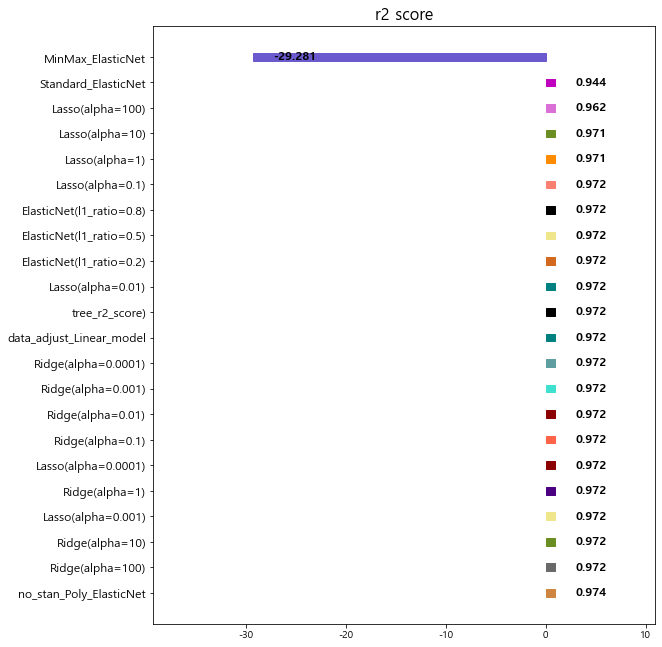

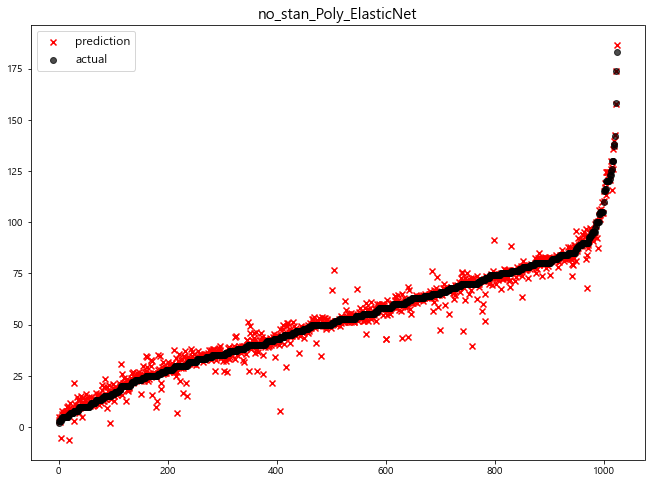

                       model        mae
0          MinMax_ElasticNet  19.361428
1        Standard_ElasticNet   3.385518
2           Lasso(alpha=100)   3.060068
3    no_stan_Poly_ElasticNet   2.557090
4             Lasso(alpha=1)   2.512171
5   data_adjust_Linear_model   2.491534
6            tree_mae_score)   2.491534
7        Ridge(alpha=0.0001)   2.491534
8         Ridge(alpha=0.001)   2.491534
9          Ridge(alpha=0.01)   2.491533
10          Ridge(alpha=0.1)   2.491531
11            Ridge(alpha=1)   2.491511
12       Lasso(alpha=0.0001)   2.491498
13           Ridge(alpha=10)   2.491308
14        Lasso(alpha=0.001)   2.491175
15          Ridge(alpha=100)   2.489668
16         Lasso(alpha=0.01)   2.488446
17          Lasso(alpha=0.1)   2.486401
18  ElasticNet(l1_ratio=0.2)   2.486395
19  ElasticNet(l1_ratio=0.5)   2.485365
20  ElasticNet(l1_ratio=0.8)   2.485347
21           Lasso(alpha=10)   2.457382


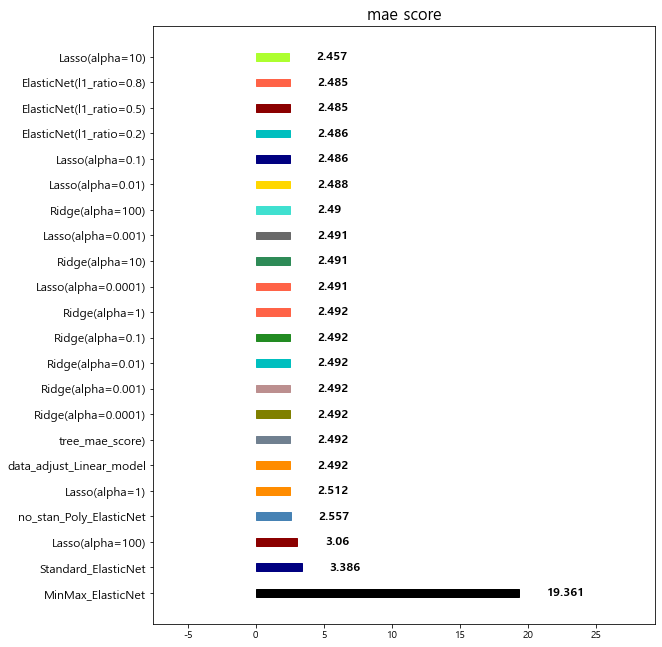

In [40]:
poly_pipeline = make_pipeline(
    # StandardScaler(),
    PolynomialFeatures(degree=2, include_bias=False),
    ElasticNet(alpha=0.1, l1_ratio=0.2),
)
poly_pipeline.fit(x_train, y_train)
poly_pred = poly_pipeline.predict(x_test)
add_model('no_stan_Poly_ElasticNet', poly_pred, y_test)
add_r2_model('no_stan_Poly_ElasticNet', poly_pred, y_test)
add_mae_model('no_stan_Poly_ElasticNet', poly_pred, y_test)
plot_all()
r2_plot_all()
mae_plot_all()

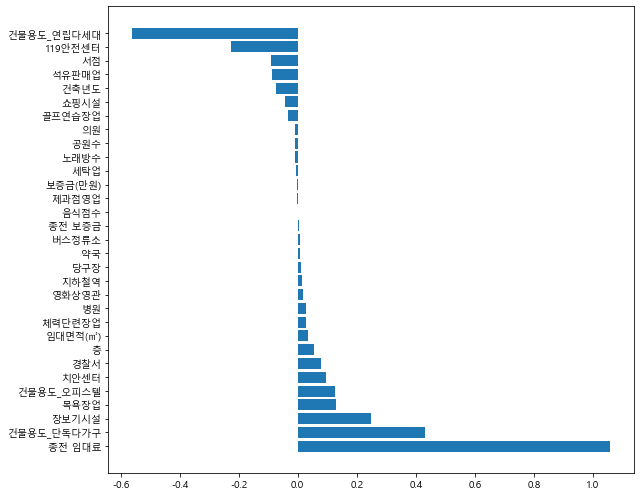

In [41]:
plot_coef(x_train.columns, model.coef_)